# CS 4650 - Natural Language - HW - 0 [Total - 25 points]
## Logistic Regression

Georgia Tech, Fall 2025 (Instructor: Kartik Goyal)
   
In this assignment, we will walk you through the process of implementing **logistic regression** from scratch. You will also apply your implemented logistic regression model to a small dataset and predict whether a student will be admitted to a university based on their scores in two exams. This dataset will allow you to visualize the data and debug more easily.

This assignment also serves as a programming preparation test. We will use [NumPy](https://numpy.org/doc/stable/user/quickstart.html) -- a popular Python package for scientific computing and implementing machine learning algorithms. It provides very good support for matrix and vector operations. You need to feel comfortable working with matrics, in order to complete all the programming projects in CS 4650.

## Points to Note -

<font color='red'><b> DEADLINE: September 9, 2025, 11:59 PM </b></font>

**EVALUATION PROCESS**

Some of the functions have a local test provided to test your implementation. However, these are for your own use. The evaluation will be done on additional test cases which are hidden from this notebook. These test cases are responsible for evaluating the exhaustive correctness of the implementation. Therefore, it is your responsibility to ensure that your implementation is correct for all cases.

Additionally, the data points of the Gradescope on which the model will be evaluated are different from the data instances provided locally. But they are sampled from the same distribution. So, you should expect some differences in the metrics, but not drastically different if your implementation is correct.

**Passing of local test cases is not a criteria for credits for an implementation.**

> ## ⚠️ External Packages
> In this assignment, except NumPy and Matplotlib, no other external Python packages are allowed. You can use Scipy/Torch functions to verify your implementation, but make sure to *REMOVE* all code, including imports in your final submission

> Imports and usage of other packages can result in zero credit in this HW.

## 1. Setup - Importing Numpy and Matplotlib [Code provided - do not change]



Here we import [Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) for data visualization and [NumPy](https://numpy.org/doc/stable/user/quickstart.html) for matrix operations, and load Google drive for importing dataset.

In [127]:
# export
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [128]:
# DO NOT CHANGE THIS CELL

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Check what version of Python is running
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [129]:
# execute only if you are working in Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Replace this by the folder path where you put your assignment. If you are working with local, skip executing the previous cell and add the path to local directory here.
folder_path = '/content/drive/My Drive/path/to/folder/HW0'

# Files in the folder -
os.listdir(folder_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/path/to/folder/HW0'

## 2. Visualizing the Data  [Code provided - no need to change]

The below will load our dataset for this project ([p0_data.txt](https://github.com/cocoxu/CS4650_projects_sp2022/blob/master/p0/p0_data.txt)).

<!-- Go ahead download the data file ([p0_data.txt](https://github.com/cocoxu/CS4650_projects_sp2022/blob/master/p0/p0_data.txt)), then upload to Google Colab using the files panel on the left (click the last icon on the menu).
 -->

Our dataset contains applicants' scores on two exams and the admission decisons for 100 students. This dataset will allow us to visualize in a 2D figure and showcase how the logistic regression algorithm works more intuitively.

In [130]:
import numpy as np

train_data = np.loadtxt("train.txt", delimiter=",")
validation_data = np.loadtxt("validation.txt", delimiter=",")

In [131]:
# export
EPSILON = 1e-8 # A small value to be used in section 3.3.

# of training examples =  80
# of features =  2


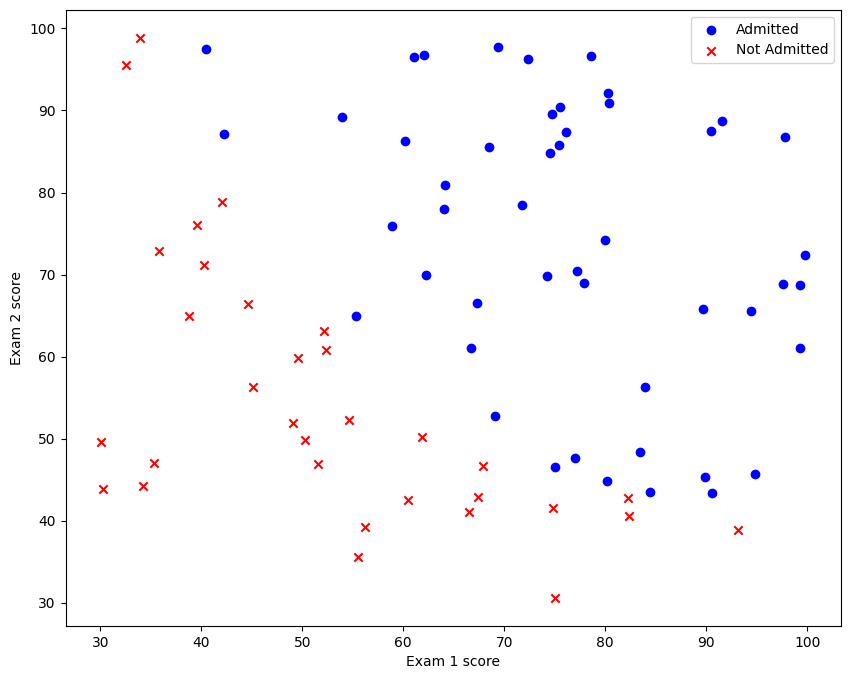

In [132]:
# DO NOT CHANGE THIS CELL

EPSILON = 1e-8 # A small value to be used in section 3.3.

train_X = train_data[:, 0:2]
train_y = train_data[:, 2]

val_X = validation_data[:, 0:2]
val_y = validation_data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

## 3. Implementing Logistic Regression Forward Pass [8 points - Programming]
You're going to first implement the sigmoid function, then the objective function for (binary) logistic regression.

Note that, you are asked to use the [NumPy](https://numpy.org/doc/stable/user/quickstart.html) package for vector and matrix operations. NumPy implements matrix-specific optimizations (compared to expensive Python datatypes, `for` loops, etc.) which [dramatically improves performance](https://stackoverflow.com/questions/8385602/why-are-numpy-arrays-so-fast), particularly in our later projects.

### 3.1 Sigmoid Implementation [2 points - Programming]

The sigmoid function is defined as $sigmoid(\mathbf{z}) = \frac{1}{1+{e^{-\mathbf{z}}}}$.

In [133]:
# export

def sigmoid(z):

    z = np.asarray(z, dtype=np.float64)   # ensure vectorized
    return 1.0 / (1.0 + np.exp(-z))


In [134]:
# DO NOT CHANGE THIS CELL

# local Checks to see if your implementation is on the right track.
if np.allclose(
    sigmoid(np.arange(10)),
    np.array([0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])
    ):
    print("Test case passed")
else:
    print("Test case failed: incorrect answer", sigmoid(np.arange(10)))

Test case passed


### 3.2. Hypothesis [1 point - Programming]
The hypothesis of a binary logistic regression is defined as
$h_θ(x) = g(xθ^T)$ (there are many ways to represent this based on the axes of both vectors)

where $g(x) = sigmoid(x)$

The predict_proba function computes the predicted probabilities for a given dataset using logistic regression. It takes as input the model parameters (θ) and the feature matrix (x). The function then calculates the probability of each sample belonging to the positive class by applying the sigmoid function to the dot product of the feature matrix and the transposed model parameters. The result is a vector of probabilities, one for each sample in the dataset.

In the function predict_proba below, implement a function that takes in θ and x, and returns the hypothesis, that is, the predicted values.

In [135]:
# export

def predict_proba(theta, X):
    '''
    Computes the predicted probabilities for a logistic regression model.

    Parameters:
    -----------
    theta : numpy.ndarray
        The model parameters of shape (1, n_features + 1). These parameters are used to
        compute the linear combination of the features.

    x : numpy.ndarray
        The input feature matrix of shape (n_samples, n_features + 1). Each row corresponds
        to a sample, and each column corresponds to a feature.

    Returns:
    --------
    h : numpy.ndarray
        A vector of shape (n_samples,) containing the predicted probabilities for each
        sample. Each value in the vector represents the probability of the corresponding
        sample belonging to the positive class (label 1).
    '''
    # Ensure arrays
    X = np.asarray(X, dtype=np.float64)
    Theta = np.asarray(theta, dtype=np.float64)

    # Normalize theta to 2D:
    # - (n_features,) -> (n_features, 1)
    # - (n_models, n_features) -> transpose to (n_features, n_models)
    if Theta.ndim == 1:
        Theta = Theta.reshape(-1, 1)
    elif Theta.shape[0] != X.shape[1] and Theta.shape[1] == X.shape[1]:
        Theta = Theta.T  # make it (n_features, n_models)

    # Now: X (n_samples, n_features) @ Theta (n_features, n_models)
    z = X @ Theta
    h = sigmoid(z)  # shape: (n_samples, n_models); (n_samples,1) if single model
    return h


In [136]:
# DO NOT CHANGE THIS CELL

# local Checks to see if your implementation is on the right track.
if np.allclose(
    predict_proba(np.arange(10).reshape(2, 5)/10, np.arange(25).reshape(5,5)/10),
    np.array([[0.57444252, 0.68997448],
       [0.68997448, 0.92757351],
       [0.78583498, 0.98661308],
       [0.85814894, 0.99764768],
       [0.90887704, 0.99959043]])):
    print("Test case passed")
else:
    print("Test case failed: incorrect local answer", predict_proba(np.arange(10).reshape(2, 5)/10, np.arange(25).reshape(5,5)/10))


Test case passed


### 3.3. Discriminative Log Likelihoods [5 points - Programming]

The discriminative negative log likelihood is a critical component in training logistic regression models. It measures how well the model predicts the observed labels \( y \) given the predicted probabilities \( h \). The goal is to minimize this value to improve model accuracy. The negative log likelihood is defined as:

$$
\text{Negative Log Likelihood} = -\frac{1}{n}\left(\sum_{i=1}^{n} y_i \cdot \log(h_i) + \sum_{i=1}^{n} (1 - y_i) \cdot \log(1 - h_i)\right)
$$

where $n$ is the number of data points in $y$ and $h$.

To prevent overfitting, we often add L2 regularization, which penalizes large coefficients in the model parameters \( \theta \). The regularized negative log likelihood is given by:

$$
\text{Regularized Negative Log Likelihood} = -\frac{1}{n}\left(\sum_{i=1}^{n} y_i \cdot \log(h_i) + \sum_{i=1}^{n} (1 - y_i) \cdot \log(1 - h_i)\right) + \frac{\lambda}{2n} \sum_{j=1}^{m} \theta_j^2
$$

Here, $\lambda$ is the regularization parameter, and $ \theta_j $ represents the model parameters. This equation combines the likelihood of the data with a penalty for large parameter values, balancing the model's fit and its complexity.

In this subsection, we will build the regularized distriminative log likelihood step-by-step.





#### 3.3.1. When $y=1$ [1 point - Programming]
The log_likelihood_positive function calculates the log likelihood of the positive examples in a binary classification problem, given the predicted probabilities and the true labels. In the context of logistic regression, the log likelihood is a measure of how well the model's predictions match the actual data. Specifically, this function focuses on the positive examples (those with a label of 1) and computes the likelihood that these examples are correctly classified according to the model's predictions.

In the following function, compute the log-likelihood when the actual label $y$ is 1. The final value should be a *sum* of log likelihoods of all examples.

Note - There is an edge case that $\log(x)$ tends to -∞ as $x$ tends to 0, which should not happen. Think about avoiding this scenario. (HINT: Add a small value to address it). You can use the defined value of EPSILON above if you need it.

In [138]:
# export

def log_likelihood_positive(h, y):
    """
    Computes the log likelihood of the positive examples given the data.

    Parameters
    ----------
    h : numpy.ndarray
        A numpy array of shape (n_samples, 1) containing the predicted probabilities
        generated from predict_proba.

    y : numpy.ndarray
        A numpy array of shape (n_samples,) containing the true labels for the data.
        The labels are 1 for positive examples and 0 for negative examples.

    Returns
    -------
    l_p : numpy.ndarray
        A numpy array of shape (1,) containing a single value representing the log likelihood
        of the positive examples given the data.

        Note, we will not divide by n here, that will be done in Section 3.3.3.
    """
    epsilon = 1e-8
    h = np.asarray(h).reshape(-1)
    y = np.asarray(y).reshape(-1)
    l_p = np.sum(np.log(h[y == 1] + epsilon))
    return np.array([l_p], dtype=float)


In [139]:
# DO NOT CHANGE THIS CELL

# local Checks to see if your implementation is on the right track.
if np.allclose(
        log_likelihood_positive(np.array([[0.37687246], [0.85885663], [0.27319692], [0.50024508], [0.17788141],
                                          [0.34725546], [0.0897733] , [0.75498808], [0.2434036] , [0.60738053]]),
                                np.array([0,1,0,1,0,0,0,1,0,1])),
        np.array([-1.62446351])
    ):
    print("Test case passed")
else:
    print("Test case failed: incorrect local answer", log_likelihood_positive(np.array([[0.37687246], [0.85885663], [0.27319692], [0.50024508], [0.17788141],
                                          [0.34725546], [0.0897733] , [0.75498808], [0.2434036] , [0.60738053]]),
                                          np.array([0,1,0,1,0,0,0,1,0,1])))


Test case passed


#### 3.3.2. When $y=0$ [1 point - Programming]

The log_likelihood_negative function computes the log likelihood of the negative examples in a binary classification problem, based on the predicted probabilities and the true labels. In logistic regression, the log likelihood is a measure of how well the model's predictions correspond to the actual data. This function specifically calculates the likelihood for the negative examples (those with a label of 0) and returns a single value representing how well the model predicts these negative cases.

In the following function, compute the log-likelihood when the actual label $y$ is 0. The final value should be a *sum* of log likelihoods of all examples.

Note - There is an edge case that $\log(x)$ tends to -∞ as $x$ tends to 0, which should not happen. Think about avoiding this scenario. (HINT: Add a small value to address it)

In [140]:
# export

def log_likelihood_negative(h, y):
    """
    Computes the log likelihood of the negative examples given the data.

    Parameters
    ----------
    h : numpy.ndarray
        A numpy array of shape (n_samples, 1) containing the predicted probabilities
        generated from predict_proba.

    y : numpy.ndarray
        A numpy array of shape (n_samples,) containing the true labels for the data.
        The labels are 1 for positive examples and 0 for negative examples.

    Returns
    -------
    l_n : numpy.ndarray
        A numpy array of shape (1,) containing a single value representing the log likelihood
        of the negative examples given the data.

        Note, we will not divide by n here, that will be done in Section 3.3.3.
    """
    epsilon = 1e-8                 # avoid log(0)
    h = np.asarray(h).reshape(-1)  # flatten to (n,)
    y = np.asarray(y).reshape(-1)  # flatten to (n,)
    l_n = np.sum(np.log(1.0 - h[y == 0] + epsilon))
    return np.array([l_n], dtype=float)


In [141]:
# DO NOT CHANGE THIS CELL

# local Checks to see if your implementation is on the right track.
if np.allclose(
        log_likelihood_negative(np.array([[0.37687246], [0.85885663], [0.27319692], [0.50024508], [0.17788141],
                             [0.34725546], [0.0897733] , [0.75498808], [0.2434036] , [0.60738053]]),
                             np.array([0,1,0,1,0,0,0,1,0,1])),
        np.array([-1.78753074])
    ):
    print("Test case passed")
else:
    print("Test case failed: incorrect local answer", log_likelihood_negative(np.array([[0.37687246], [0.85885663], [0.27319692], [0.50024508], [0.17788141],
                             [0.34725546], [0.0897733] , [0.75498808], [0.2434036] , [0.60738053]]),
                             np.array([0,1,0,1,0,0,0,1,0,1])))

Test case passed


#### 3.3.3. Regularized Discriminative Negative Log Likelihood [3 points - Programming]

Use the implementations in 3.3.1. and 3.3.2. to construct discriminative log-likelihood function with L2 regularization.

Try making a single combined function which implements both in a single line. Notice how y is only 1 or 0, for positive or negative labels repectively. How can you use this for changing how likelihood is computed in your single line without an if statment on the example?

For reference, following is the equation -

$$
\text{Regularized Negative Log Likelihood} = -\frac{1}{n}\left(\sum_{i=1}^{n} y_i \cdot \log(h_i) + \sum_{i=1}^{n} (1 - y_i) \cdot \log(1 - h_i)\right) + \frac{\lambda}{2n} \sum_{j=1}^{m} \theta_j^2
$$

Note, $θ_{bias}$ is not added to the regularization.

Hint:
- Use the above two functions in 3.3.1. and 3.3.2. to construct this function.
- Assume the 0th element of θ to be the bias term. Also note that the bias is not regularized. For example, if θ = $[[a, b, c]]$, $a$ is the bias.

In [142]:
# export

def discriminative_negative_log_likelihood(h, y, theta=None, lambda_=0.0):
    """
    Computes the regularized negative log likelihood of the labels y given the data.

    Parameters
    ----------
    h : numpy.ndarray
        A numpy array of shape (n_samples, 1) containing the predicted probabilities
        generated from predict_proba.

    y : numpy.ndarray
        A numpy array of shape (n_samples,) containing the true labels for the data.
        The labels are 1 for positive examples and 0 for negative examples.

    theta : numpy.ndarray, optional
        A numpy array of shape (1, n_features + 1) containing the model parameters. This is
        required if L2 regularization is applied. 0th dimension contains the bias term's coefficient.

    lambda_ : float, optional
        The regularization strength (λ). This value is multiplied by the L2 penalty term
        to control the impact of regularization. Default is 0.0 (no regularization).

    Returns
    -------
    l : numpy.ndarray
        A numpy array of shape (1,) containing a single value representing the regularized
        negative log likelihood of the labels y given the data. If L2 regularization is applied,
        the returned value includes the regularization penalty.

    Notes
    -----
    The regularized negative log likelihood is given by:

        L_reg = - (log_likelihood_positive(h, y) + log_likelihood_negative(h, y))
                + (λ/2) * sum(θ^2)

    where the sum is over all features in θ.

    The bias term (0th dimension of the array is not regularized)
    """
    eps = 1e-8
    h = np.asarray(h).reshape(-1)
    y = np.asarray(y).reshape(-1)
    n = y.size

    # unregularized NLL
    ll_pos = np.sum(y * np.log(h + eps))
    ll_neg = np.sum((1 - y) * np.log(1.0 - h + eps))
    l = -(ll_pos + ll_neg) / n

    # L2 regularization (skip bias at index 0)
    if theta is not None and lambda_ > 0:
        th = np.asarray(theta).reshape(-1)  # (d,)
        l += (lambda_ / (2.0 * n)) * np.sum(th[1:] ** 2)

    return np.array([l], dtype=float)


In [143]:
# DO NOT CHANGE THIS CELL

# Test case 1: Without regularization
h_test1 = np.array([[0.37687246], [0.85885663], [0.27319692], [0.50024508], [0.17788141],
                    [0.34725546], [0.0897733], [0.75498808], [0.2434036], [0.60738053]])
y_test1 = np.array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

if np.allclose(
        discriminative_negative_log_likelihood(h_test1, y_test1),
        np.array([0.34119941])
    ):
    print("Test case without regularization passed")
else:
    print("Test case without regularization failed: incorrect local answer",
          discriminative_negative_log_likelihood(h_test1, y_test1))

# Test case 2: With regularization
theta_test2 = np.array([0.5, -0.25, 0.75])
lambda_test2 = 1.5

# Manually calculate the expected output
if np.allclose(
        discriminative_negative_log_likelihood(h_test1, y_test1, theta_test2, lambda_test2),
        0.38807441
    ):
    print("Test case with regularization passed")
else:
    print("Test case with regularization failed: incorrect local answer",
          discriminative_negative_log_likelihood(h_test1, y_test1, theta_test2, lambda_test2))



Test case without regularization passed
Test case with regularization passed


## 4. Gradient Computation [5 points - Programming]

In logistic regression, the gradient update is a crucial step in adjusting the model parameters $\theta$ to minimize the loss function, which is the negative log likelihood. The gradient is calculated based on the difference between the predicted probabilities $h$ and the true labels $y$.

We are not directly providing you with the gradient expression to implement. Please use the expression of Regularized Negative Log Likelihood from section 3.3, and differentiate it to get its gradient.


Using the derived expression, implement the gradient computations for logistic regression, i.e., the gradient update for the discriminative negative log likelihood function you created above.

In [144]:
# export

def gradient_update(theta, X, y, lambda_=0.0):
    """
    Computes the gradient update for logistic regression, including L2 regularization.

    Parameters
    ----------
    theta : numpy.ndarray
        A numpy array of shape (1, n_features + 1) containing the model parameters.

    X : numpy.ndarray
        A numpy array of shape (n_samples, n_features + 1) containing the input feature matrix.

    y : numpy.ndarray
        A numpy array of shape (n_samples,) containing the true labels for the data.
        The labels are 1 for positive examples and 0 for negative examples.

    lambda_ : float, optional
        The regularization strength (λ). This value is used to scale the L2 regularization
        term in the gradient update. Default is 0.0 (no regularization).

    Returns
    -------
    grad : numpy.ndarray
        A numpy array of shape (1, n_features + 1) containing the gradient of the log likelihood
        with respect to the model parameters, including the L2 regularization term if applied.
    """
    X = np.asarray(X, dtype=np.float64)                      # (n, d)
    y = np.asarray(y, dtype=np.float64).reshape(-1, 1)       # (n, 1)
    theta_arr = np.asarray(theta, dtype=np.float64)          # keep original shape
    orig_shape = theta_arr.shape

    # Work in column form internally
    th = theta_arr.reshape(-1, 1)                            # (d, 1)
    n = y.shape[0]

    # Predictions
    h = predict_proba(th, X)                                 # (n, 1)

    # Core gradient
    error = h - y                                            # (n, 1)
    grad_col = (X.T @ error) / n                             # (d, 1)

    # L2 on non-bias (skip index 0)
    if lambda_ != 0:
        reg = (lambda_ / n) * th
        reg[0, 0] = 0.0
        grad_col += reg

    # Return in the same shape as theta
    if len(orig_shape) == 2 and orig_shape[0] == 1:
        return grad_col.T                                    # (1, d)
    elif len(orig_shape) == 1:
        return grad_col.ravel()                              # (d,)
    else:
        return grad_col                                      # (d, 1)

In [145]:
# DO NOT CHANGE THIS CELL

theta_test1 = np.array([[0.5, -0.5, 1.0]])
X_test1 = np.array([[1, 2, 3],
                    [1, 3, 4],
                    [1, 5, 6],
                    [1, 7, 8],
                    [1, 9, 10]])
y_test1 = np.array([0, 1, 0, 1, 0])
expected_grad_without_reg = np.array([[0.56991285, 3.10939428, 3.67930713]])
grad_without_reg = gradient_update(theta_test1, X_test1, y_test1, lambda_=0.0)
if np.allclose(grad_without_reg, expected_grad_without_reg, atol=1e-6):
    print("Test case without regularization passed")
else:
    print("Test case without regularization failed: incorrect local answer", grad_without_reg)

theta_test2 = np.array([[0.5, -0.5, 1.0]])
lambda_test2 = 0.1
expected_grad_with_reg = np.array([[0.56991285, 3.09939428, 3.69930713]])
grad_with_reg = gradient_update(theta_test2, X_test1, y_test1, lambda_=lambda_test2)
if np.allclose(grad_with_reg, expected_grad_with_reg, atol=1e-6):
    print("Test case with regularization passed")
else:
    print("Test case with regularization failed: incorrect local answer", grad_with_reg)

Test case without regularization passed
Test case with regularization passed


## 5. Gradient Descent  and Decision Boundary  [7 points - Non Programming]

In this exercise, you'll implement the batch gradient descent algorithm for logistic regression. Your task involves:

1. **Enhancing the Feature Matrix:** Add a bias term to the input feature matrix `X`. Note that in the above examples, during regularization, the first term was considered as bias coefficient. This decision will impact the place where bias is added to data points.
2. **Gradient Update:** Implement the simultaneous update of model parameters `theta` using the learning rate `alpha` and the gradient of the loss function.
3. **Regularization:** Apply L2 regularization controlled by `lambda_` to prevent overfitting.
4. **Loss Monitoring:** Calculate and print the negative log-likelihood loss at specified intervals (`print_iterations`) to track the learning progress.
5. **Decision Boundary Visualization:** Plot the decision boundary after selected iterations to visualize how the model improves over time.

Your goal is to optimize `theta` by minimizing the loss function and effectively separating the classes in the dataset.


Implement the batch gradient decent algorithm for logistic regression. For every `print_iterations` number of iterations, also visualize the decision boundary and observe how it changes during the training. You should utilize functions implemented above to help you with this part.

Note - The 10 points will be awarded on the decision boundary generated upon training via the PDF of your submission.

In [146]:
# export

def gradient_descent(theta, X, y, alpha, lambda_, max_iterations, print_iterations):
    """
    Implements the batch gradient descent algorithm for logistic regression,
    with visualization of the decision boundary during the learning process.

    Parameters
    ----------
    theta : numpy.ndarray
        A numpy array of shape (1, n_features + 1) containing the initial model parameters.
        The additional feature is for the bias term.

    X : numpy.ndarray
        A numpy array of shape (n_samples, n_features + 1) containing the input feature matrix.
        Each row corresponds to a sample, and each column corresponds to a feature.

    y : numpy.ndarray
        A numpy array of shape (n_samples,) containing the true labels for the data.
        The labels are 1 for positive examples and 0 for negative examples.

    alpha : float
        The learning rate used to control the step size during the gradient descent update.

    lambda_ : float
        The regularization parameter (λ) used to control the L2 regularization term.

    max_iterations : int
        The maximum number of iterations to run the gradient descent algorithm.

    print_iterations : int
        The number of iterations between each visualization and printing of the loss.
        This allows for observing the learning process over time.

    Returns
    -------
    theta : numpy.ndarray
        A numpy array of shape (1, n_features + 1) containing the optimized model parameters
        after gradient descent has converged or reached the maximum number of iterations.
    """
    iteration = 0

    # --- Add bias column (make X: [1, x1, x2]) ---
    X = np.asarray(X, dtype=np.float64)
    if X.shape[1] == 2:                        # if bias not yet present
        X = np.c_[np.ones((X.shape[0], 1)), X] # (n, 3)

    y = np.asarray(y, dtype=np.float64).reshape(-1, 1)
    theta = np.asarray(theta, dtype=np.float64)  # keep original shape for updates


    while(iteration < max_iterations):
        iteration += 1

        ### YOUR CODE HERE: simultaneous update of partial gradients
        grad = gradient_update(theta, X, y, lambda_)   # same shape as theta
        theta = theta - alpha * grad

        # For every print_iterations number of iterations
        if iteration % print_iterations == 0 or iteration == 1:
            loss = 0

            ### YOUR CODE HERE: calculate the discriminative log likelihood
            ### IMPORTANT: The negative discriminative log likelihood is
            ###             guaranteed to decrease after every iteration
            ###             of the gradient descent algorithm.
            h = predict_proba(theta, X)  # shape (n,1)
            loss = discriminative_negative_log_likelihood(
                h, y, theta=theta.reshape(-1), lambda_=lambda_
            )

            ### END YOUR CODE

            print ("[ Iteration", iteration, "]", "loss =", loss)
            plt.rcParams['figure.figsize'] = (5, 4)
            plt.xlim([20,110])
            plt.ylim([20,110])

            pos = np.where(y == 1)
            neg = np.where(y == 0)

            plt.scatter(X[pos, 1], X[pos, 2], marker='o', c='b')
            plt.scatter(X[neg, 1], X[neg, 2], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Admitted', 'Not Admitted'])
            t = np.arange(10, 100, 0.1)

            ### YOUR CODE HERE: plot the decision boundary.
            ### Use t as x-axis values and utilize theta to compute the equation of the line.
            ### Thereafter, use plt.plot to plot the values.
            t = np.arange(10, 100, 0.1)
            th = theta.reshape(-1)  # [θ0, θ1, θ2]
            if th.size >= 3 and th[2] != 0:
                x2_line = -(th[0] + th[1] * t) / th[2]
                plt.plot(t, x2_line)
            plt.show()

    return theta


Define the hyperparameters for your training below. We will take these hyperparameters to train your model on Gradescope and evaluate it on the test set that we have remotely. Ideally the training should be same as the local as we will train on the same split that is provided with the assignment.

In [253]:
# export
# Define your hyperparameters here

def get_hyperparameters():
  alpha_test = 0.1
  max_iter = 100000
  print_iter = 10000 # you can experiment with this, but there is no need to change this value for final submission. This won't impact your accuracy.
  lambda_ = 0.0
  return alpha_test, max_iter, print_iter, lambda_

[ Iteration 1 ] loss = [11.05240844]


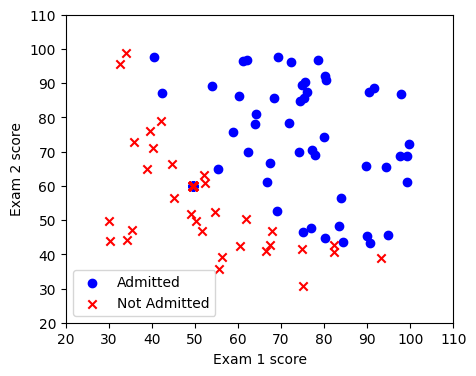

[ Iteration 10000 ] loss = [10.51189936]


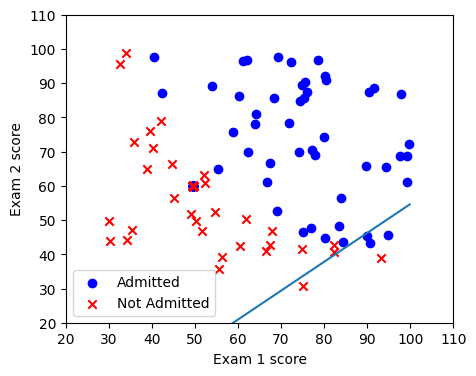

[ Iteration 20000 ] loss = [7.36827229]


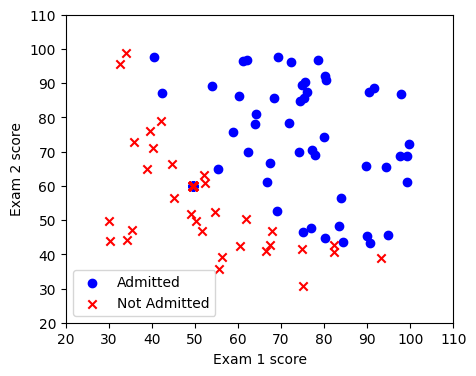

[ Iteration 30000 ] loss = [6.44723914]


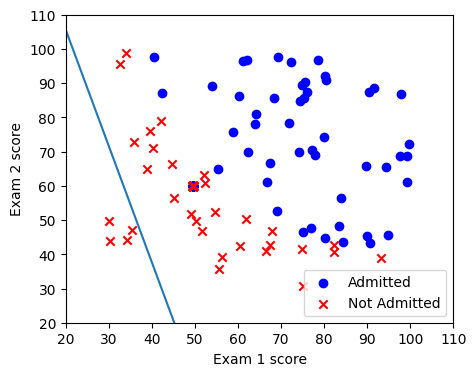

[ Iteration 40000 ] loss = [7.36827229]


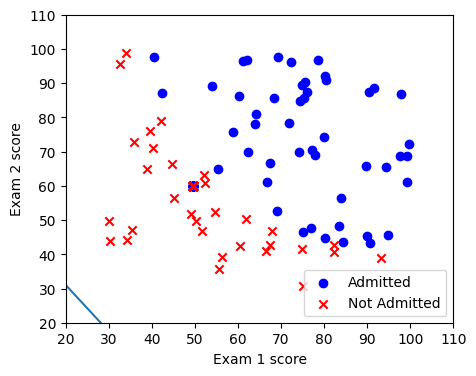

[ Iteration 50000 ] loss = [10.55983917]


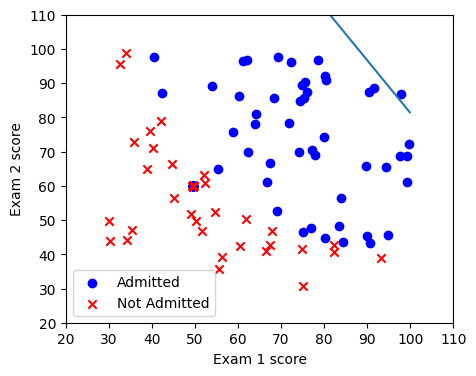

[ Iteration 60000 ] loss = [6.77602574]


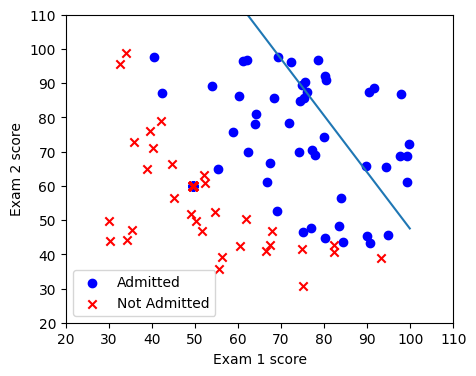

[ Iteration 70000 ] loss = [2.8012942]


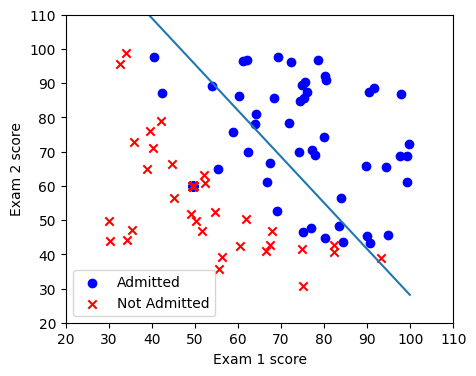

[ Iteration 80000 ] loss = [6.30984506]


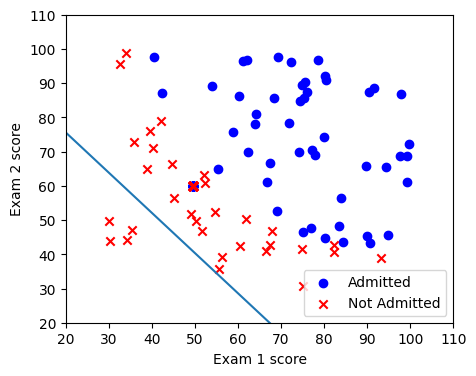

[ Iteration 90000 ] loss = [3.75184439]


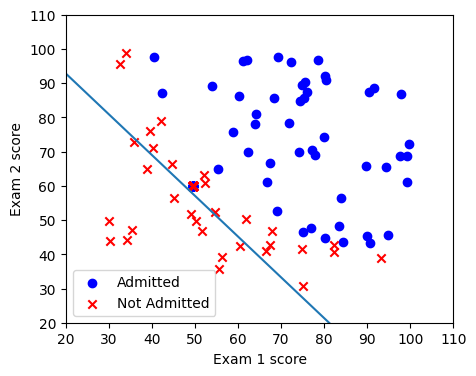

[ Iteration 100000 ] loss = [2.34853225]


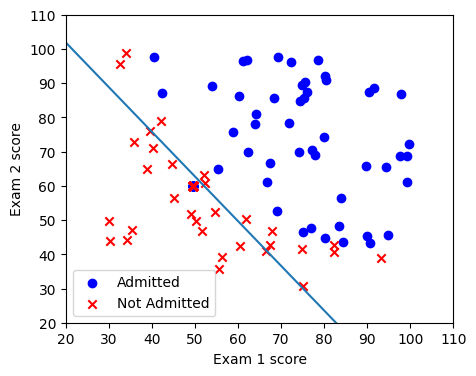

In [254]:
# DO NOT CHANGE THIS CELL

# Execute Training
initial_theta = np.random.randn(1, (n_features) +1)
alpha_test, max_iter, print_iter, lambda_ = get_hyperparameters()
learned_theta = gradient_descent(initial_theta, train_X, train_y, alpha_test, lambda_, max_iter, print_iter)

## 6. Prediction [5 points - Programming]

Now that you learned the parameters of the model, you can use the model to predict whether a particular student will be admitted.


The `predict` function uses the parameters $\theta$ learned during training to predict whether each input sample belongs to the positive class (label 1) or the negative class (label 0). The prediction process involves the following steps:

1. **Add Bias Term**: A column of ones is added to the input feature matrix $X $ to account for the bias term in the model.
2. **Calculate Probabilities**: The model computes the probability $h_{\theta}(X)$ that each sample belongs to the positive class using the sigmoid function:
   $
   h_{\theta}(X) = \frac{1}{1 + e^{-\theta^T X}}
   $
3. **Classify**: If the computed probability is greater than a given threshold, the sample is classified as label 1 (positive class); otherwise, it is classified as label 0 (negative class).

The function returns both the probabilities and the predicted labels, where the predicted labels are binary (0 or 1). You should be able to do this using all existing functions you have implemented.


In [255]:
# export

def predict(theta, X):
    """
    Predicts whether the label is 0 or 1 using learned logistic regression parameters.

    Parameters
    ----------
    theta : numpy.ndarray
        A numpy array of shape (1, n_features + 1) containing the learned model parameters,
        including the bias term.

    X : numpy.ndarray
        A numpy array of shape (n_samples, n_features + 1) containing the input feature matrix.
        Each row corresponds to a sample, and each column corresponds to a feature.

    Returns
    -------
    probabilities : numpy.ndarray
        A numpy array of shape (n_samples,) containing the predicted probabilities that each
        sample belongs to the positive class (label 1).

    predicted_labels : numpy.ndarray
        A numpy array of shape (n_samples,) containing the predicted labels (0 or 1) for each
        sample based on the threshold of 0.5.
    """
    probabilities = None
    predicted_labels = None
    # Ensure X has bias column
    X = np.asarray(X, dtype=np.float64)
    if X.shape[1] == theta.shape[1] - 1:   # if missing bias column
        X = np.c_[np.ones((X.shape[0], 1)), X]

    # Compute probabilities
    probabilities = predict_proba(theta, X).reshape(-1)

    # Classify with threshold 0.5
    predicted_labels = (probabilities >= 0.5)

    # Convert boolean array to integer array (0 or 1)
    return probabilities, predicted_labels.astype(int)


Following are the score distributions -
- Accuracy < 80.0 - 0 points
- 80.0 <= Accuracy < 82.0 - 1 point
- 82.0 <= Accuracy < 85.0 - 3 point
- Accuracy >= 85.0 - 5 points

Note, expect around 3% reduction in accuracy difference between your local validation split v/s test split of Gradescope. This is because we have less number of data points in both the splits. The above brackets are for the Gradescope splits, not the local ones.

In [256]:
# DO NOT CHANGE THIS CELL

# Test cases for predictions
t_X1 = np.array([[90, 90]])
t_X2 = np.array([[50, 60]])
t_X3 = np.array([[10, 50]])

# Predictions for the test inputs
prob1, label1 = predict(learned_theta, t_X1)
prob2, label2 = predict(learned_theta, t_X2)
prob3, label3 = predict(learned_theta, t_X3)

# Print predictions in a user-friendly format
print(f"Prediction for marks {t_X1}: Probability of Admission = {prob1[0]}, Admitted? = {label1[0]}")
print(f"Prediction for marks {t_X2}: Probability of Admission = {prob2[0]}, Admitted? = {label2[0]}")
print(f"Prediction for marks {t_X3}: Probability of Admission = {prob3[0]}, Admitted? = {label3[0]}")

# Compute accuracy on the training dataset
test_prob, test_label = predict(learned_theta, val_X)
correct_predictions = np.sum(test_label == val_y)
t_accuracy = correct_predictions / float(val_y.size) * 100

# Print accuracy in a user-friendly format
print(f"\nAccuracy on the training set: {t_accuracy:.2f}%")

Prediction for marks [[90 90]]: Probability of Admission = 1.0, Admitted? = 1
Prediction for marks [[50 60]]: Probability of Admission = 3.230184098570434e-05, Admitted? = 0
Prediction for marks [[10 50]]: Probability of Admission = 3.2251538588662736e-107, Admitted? = 0

Accuracy on the training set: 96.00%


## 7. Submit Your Homework
This is the end. Congratulations!  

### 7.1. Programming

The programming will be evaluated through an autograder. To create the file to submit for autograder, follow the steps below -

1. Download the entire folder from Colab to your local if you are working in Colab
2. Open a terminal from the root directory of the project
3. Run the notebook2script.py file from your terminal
4. Agree to the Late Policy and Honor Pledge

After the script is executed, your root project will have a submission directory and a submission.py file in it.

5. Submit this file to GradeScope in Homework 0 - Programming assignment.


### 7.2. Non-Programming

Non-programming parts will be evaluated manually. For this, export the notebook to a PDF file (refer to Piazza for guidelines on this - optional), and submit it on GradeScope. Note, the PDF must not have any clipped outputs, otherwise, they will not be graded. One reliable way to do it is first download it as HTML through Jupyter Notebook and then print it to get PDF.

Upload the PDF  to Homework 0 - Non Programming and label the pages that contains output of Section 5.

In [153]:
!python notebook2script.py

/content/notebook2script.py:17: SyntaxWarning: invalid escape sequence '\s'
  matchList = [re.search("^\s*tests", cell) for cell in cellText]  # If any spaces are in front
Late Policy:

      "I have read the late policy for CS 4650."
    
Please type 'yes' to agree and continue>yes


Honor Pledge:

      "I have read the Collaboration and Academic Honesty policy for CS 4650.
      I certify that I have or will use outside references only in accordance with
      this policy, that I have or will cite any such references via code comments,
      and that I have not or will not copy any portion of my submission from another
      past or current student."

    
Please type 'yes' to agree and continue>yes


Converted CS4650_HW0_Fall2025.ipynb to submission/submission.py
